# TP1 de MCS

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

## Partie I

In [2]:
def DTW(w0, w1, w2, seq1, seq2, d):
    I, J = seq2.shape[0], seq1.shape[0]
    g = np.empty((I+1,J+1))
    g.fill(None)

    g[0][0] = 0


    for j in range(1,J+1):
        g[0][j] = np.Infinity

    for i in range(1,I+1):
        g[i][0] = np.Infinity
        for j in range(1,J+1):
            g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)


#     print(g)
    score = g[I][J]/(I+J)
#     print(f'score: {score}')

    return score 

Définition des fonctions de distance

In [3]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [4]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

1.0

Test avec l'exemple de l'exercice **2.1**

In [5]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

3.6

Test avec l'exemple de l'exercice **2.2**

In [6]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

0.16666666666666666

Test avec l'exemple de l'exercice **2.3**

In [7]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [8]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

0.25 1.0 0.7
Le mot 'cinq' est donc reconnu


*Question 2.*

In [9]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

0.6 0.6153846153846154 0.6153846153846154
En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score


## Partie II

In [10]:
import librosa

In [11]:
m1, sr_m1 = librosa.load("corpus_test/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus_dgo/non_bruite/M20_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [12]:
print(mfcc_m1.transpose().shape)
print(mfcc_m1.transpose())

(23, 12)
[[-5.69067566e+02  3.96389389e+01  1.16038837e+01 -2.67735660e-01
   9.88271117e-01  2.37937379e+00  1.00877911e-01  6.42509699e-01
   2.86828935e-01  8.91457915e-01  2.99287796e+00  1.82023382e+00]
 [-5.58488953e+02  4.44846840e+01  1.02761135e+01  3.52746129e+00
   4.30340958e+00  3.58957005e+00 -1.47373724e+00 -5.46282768e+00
  -5.81379318e+00 -1.21794951e+00 -2.13599253e+00 -6.74367237e+00]
 [-5.27500610e+02  6.16945305e+01 -6.19593811e+00 -1.68548317e+01
  -1.18617082e+00  1.41989098e+01  5.13344002e+00 -8.81754303e+00
  -1.06254597e+01 -1.73280811e+00  3.70688725e+00 -2.25795221e+00]
 [-3.69334015e+02  1.60807571e+02  4.36984825e+00 -2.24313698e+01
  -3.25781326e+01  2.81653252e+01 -2.95342296e-01 -1.72252369e+01
  -6.89808726e-01 -1.46516647e+01 -5.96899986e+00  1.61949527e+00]
 [-2.19406464e+02  2.12065399e+02 -4.60909195e+01 -2.36441422e+01
  -4.77081985e+01  1.98847046e+01 -1.79825325e+01 -2.40556965e+01
   3.44541121e+00 -2.67376785e+01 -2.82614899e+00  1.70961201e-

In [13]:
print(mfcc_f1)

[[-6.18828613e+02 -6.07766052e+02 -6.18259277e+02 -6.13610901e+02
  -3.16548065e+02 -1.89557358e+02 -1.98688873e+02 -1.70788315e+02
  -1.54636597e+02 -2.33654144e+02 -3.22669006e+02 -2.58229187e+02
  -1.61193558e+02 -2.27790421e+02 -2.21338882e+02 -2.35526108e+02
  -3.12782288e+02 -3.88017548e+02 -4.13069916e+02 -4.34809021e+02
  -4.60775757e+02 -5.78447937e+02]
 [ 0.00000000e+00  1.50993252e+01  7.91183054e-01  7.29091406e+00
   1.72136826e+02  1.86211761e+02  1.73236328e+02  1.78295349e+02
   1.75579834e+02  1.68052597e+02  1.55477570e+02  1.04072968e+02
   1.51757416e+02  2.08314041e+02  1.93034912e+02  2.14628906e+02
   1.81912140e+02  1.71293106e+02  1.57398209e+02  1.44030457e+02
   1.24804886e+02  4.72604294e+01]
 [ 0.00000000e+00  1.35412369e+01  7.49960542e-01  7.03175545e+00
  -3.12838535e+01 -6.56323700e+01 -5.24264374e+01 -6.96221466e+01
  -8.17521210e+01 -3.60614510e+01 -2.51696396e+01 -6.37107315e+01
  -6.00957756e+01 -2.66189976e+01 -3.17959900e+01 -2.68666897e+01
  -1.4

In [14]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

70.12889158460828

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [16]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,2)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_dgo_test_nb = ['M%.2d'%i for i in range(20,21)]
IDs_M_dgo_test_b = ['M%.2d'%i for i in range(21,22)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_reference = ['M%.2d'%i for i in range(1,2)]
IDs_F_reference = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test
IDs_dgonb = IDs_M_dgo_test_nb
IDs_dgob = IDs_M_dgo_test_b
IDs_reference = IDs_M_reference + IDs_F_reference


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test,
        "diegonb": IDs_dgonb,
        "diegob": IDs_dgob,
       "reference" : IDs_reference # M01 en attendant de trouver mieux
      }

#### Fonction de génération du chemin d'un fichier (Linux)

In [17]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
    elif typeSon == "diegonb":
        chemin = "corpus_dgo/non_bruite"
    elif typeSon == "diegob":
        chemin = "corpus_dgo/bruite"
    elif typeSon == "reference":
        chemin = "corpus_reference"
        
    chemin += f"/{ID}_{action}.wav"
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [18]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

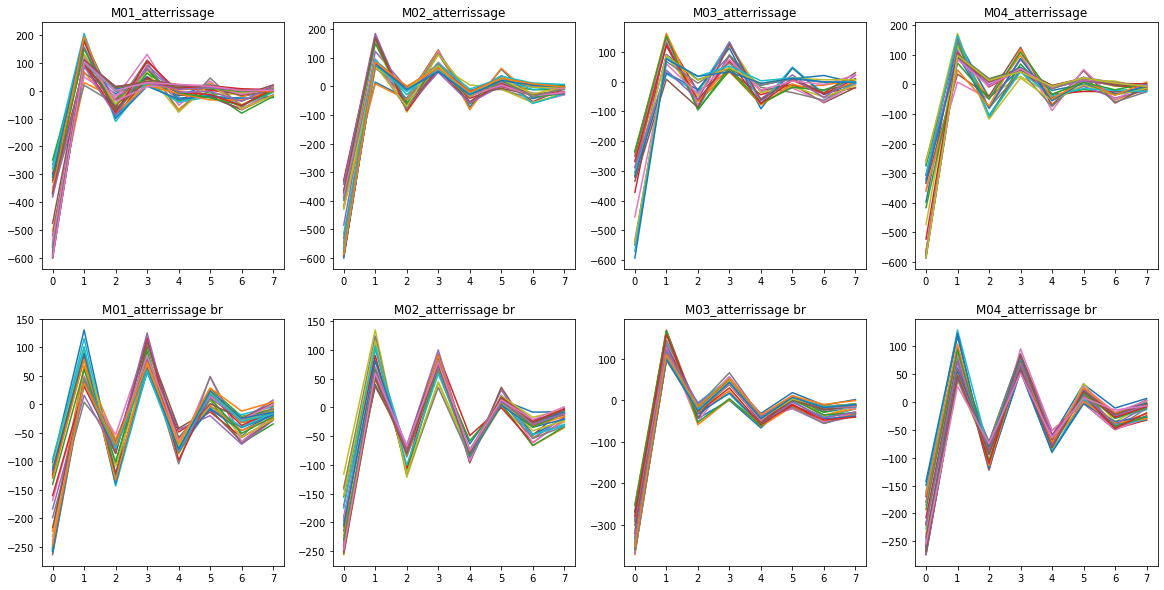

In [19]:
for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, 4+i+1)
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

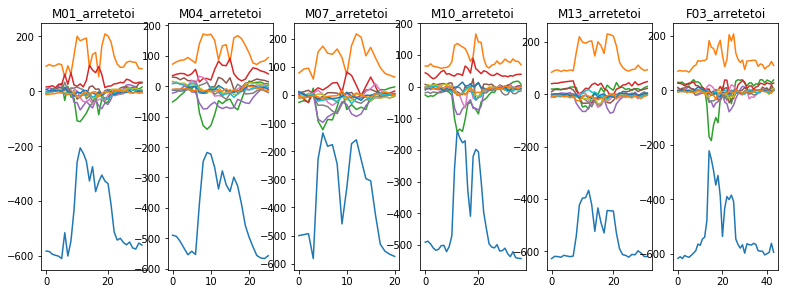

In [20]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        
        
        plt.subplot(2,len(IDs["nonbruite"])/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [21]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0

    for typeSon in IDs:
        for ID in IDs[typeSon]:
            for action in actions:
                filename = gen_path(typeSon, ID, action)
                if filename != action_to_find:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {action} ({ID})" 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)))


    results.sort(key=lambda k:k[1])

    for i, (action, result) in enumerate(results):
        print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
    print()

    print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')


In [22]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus/dronevolant_nonbruite/M08_etatdurgence.wav

1:	nonbruite etatdurgence (M01)	|	54.80533296289578
2:	reference etatdurgence (M01)	|	54.80533296289578
3:	nonbruite decollage (M13)   	|	57.613745061974775
4:	nonbruite etatdurgence (M04)	|	57.655460242069125
5:	nonbruite etatdurgence (M02)	|	59.20616349306974
6:	nonbruite plushaut (M12)    	|	59.286436658917054
7:	nonbruite etatdurgence (M05)	|	60.033266551910884
8:	nonbruite droite (M08)      	|	60.333643292623854
9:	nonbruite faisunflip (M08)  	|	60.784076715127014
10:	nonbruite tournedroite (M08)	|	60.92896894975142
11:	nonbruite avance (M08)      	|	61.85070135008614
12:	nonbruite plusbas (M10)     	|	62.48377652601762
13:	nonbruite plushaut (M08)    	|	63.18161756852094
14:	nonbruite etatdurgence (F03)	|	64.11581115233592
15:	nonbruite tournedroite (M10)	|	64.2682752609253
16:	nonbruite etatdurgence (M12)	|	65.19913785751552
17:	nonbruite etatdurgence (M09)	|	65.78170888564166
18:	nonbruite etatdurgence (M10)	|	65.82711339608217

#### Fonction de comparaison montrant la commande la plus probable pour chaque voix

In [23]:
def compare_mfcc_voices(filepath, affichage = True):
    
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = dict()

    max_details_len = 0 
        
    for typeSon in IDs:
        for ID in IDs[typeSon]:
            dtw_min_score = 10**5
            dtw_min_action = ""

            for action in actions:
                filename = gen_path(typeSon, ID, action)
                
                if filename != filepath:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {ID}"
                    action_display = action_details +" "+ action

                    if len(action_display)+1 > max_details_len:
                        max_details_len = len(action_display)

                    dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)

                    if dtw_score < dtw_min_score:
                        dtw_min_score = dtw_score
                        results[action_details] = (action, dtw_min_score)
    
    if affichage:
        for key in sorted(results.keys(), key=lambda k: results[k][1]):
            action, result = results[key]
            action_dsp = f'{key}: {action}'
            print(f'{action_dsp:<{max_details_len}}\t|\t{result}')
            
    return sorted(results.keys(), key=lambda k: results[k][1])
    
   

In [24]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)

corpus/dronevolant_nonbruite/M12_gauche.wav

nonbruite M12: tournegauche	|	38.180083105835735
nonbruite M10: gauche     	|	50.415984530197946
nonbruite M05: gauche     	|	53.01625735517861
nonbruite M08: faisunflip 	|	55.50947596703047
nonbruite M09: gauche     	|	57.30196768140036
nonbruite M01: plusbas    	|	58.10507246047732
reference M01: plusbas    	|	58.10507246047732
nonbruite M06: gauche     	|	60.61378524416969
nonbruite F03: gauche     	|	61.3731886545817
test M01: atterrissage    	|	64.1717421412468
nonbruite M13: decollage  	|	64.3383356891101
nonbruite F01: gauche     	|	64.42677450180054
nonbruite F05: gauche     	|	64.64248596675812
diegonb M20: plusbas      	|	65.1295911918566
nonbruite M07: faisunflip 	|	65.16942974778472
nonbruite F04: gauche     	|	65.67738640826681
nonbruite M03: decollage  	|	66.07251479707915
nonbruite M04: plusbas    	|	67.03084643133755
nonbruite F02: decollage  	|	73.24909998919513
nonbruite M02: faisunflip 	|	81.817379105259
nonbruite M11: plu

['nonbruite M12',
 'nonbruite M10',
 'nonbruite M05',
 'nonbruite M08',
 'nonbruite M09',
 'nonbruite M01',
 'reference M01',
 'nonbruite M06',
 'nonbruite F03',
 'test M01',
 'nonbruite M13',
 'nonbruite F01',
 'nonbruite F05',
 'diegonb M20',
 'nonbruite M07',
 'nonbruite F04',
 'nonbruite M03',
 'nonbruite M04',
 'nonbruite F02',
 'nonbruite M02',
 'nonbruite M11',
 'bruite M03',
 'bruite M04',
 'bruite M01',
 'bruite M02',
 'diegob M21']

### Test avec le corpus de voix perso

In [25]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus_test/M01_atterrissage.wav

1:	nonbruite decollage (M05)   	|	59.53539770025956
2:	test decollage (M01)        	|	62.005907182340266
3:	diegonb plusbas (M20)       	|	62.150097406038675
4:	test gauche (M01)           	|	62.54496185596172
5:	nonbruite gauche (M12)      	|	64.1717421412468
6:	nonbruite atterrissage (M12)	|	67.73113493485884
7:	nonbruite gauche (M05)      	|	67.93580763218766
8:	test faisunflip (M01)       	|	68.02947480861957
9:	nonbruite arretetoi (M12)   	|	68.6559905067819
10:	nonbruite recule (M12)      	|	69.14266511260486
11:	nonbruite faisunflip (M12)  	|	69.41925996722597
12:	nonbruite tournegauche (M12)	|	70.45994562342547
13:	nonbruite plushaut (M05)    	|	71.00810163529192
14:	nonbruite plusbas (M12)     	|	71.02488356121516
15:	nonbruite gauche (M10)      	|	71.12474987723611
16:	nonbruite atterrissage (M05)	|	71.85453472715436
17:	diegonb tournegauche (M20)  	|	71.98257812188596
18:	nonbruite plushaut (M10)    	|	72.30980747938156
19:	nonbruite recule 

In [26]:
import time


action_to_find = gen_random_path("diegob")


print(action_to_find, end="\n\n")

debut=time.time()
results = compare_mfcc_voices(action_to_find, False)
fin= time.time()
print(fin - debut)

print(results)

corpus_dgo/bruite/M21_plushaut.wav

23.47028160095215
['diegob M21', 'bruite M03', 'diegonb M20', 'test M01', 'bruite M04', 'bruite M02', 'nonbruite F02', 'nonbruite M07', 'bruite M01', 'nonbruite M08', 'nonbruite M03', 'nonbruite M10', 'nonbruite M05', 'nonbruite M04', 'nonbruite M12', 'nonbruite M09', 'nonbruite M11', 'nonbruite F05', 'nonbruite M02', 'nonbruite F03', 'nonbruite M01', 'reference M01', 'nonbruite F01', 'nonbruite M13', 'nonbruite F04', 'nonbruite M06']


choisir quoi comme base de référence ?

In [27]:
def compare_mfcc_to_reference(path_action_to_find, references, affichage = True):
    """
    On fixe un ensemble de fichier de référence (M01 par exemple) 
    et on donne a notre fonction une action de test (path_action_to_find).
    Cette fonction retourne les différents score de la DTW entre notre 
    action de test et les actions de notre corpus de référence.    
    
    """
    reference_typeSon, reference_ID = references
    y_son, sr_son = librosa.load(path_action_to_find)
    
    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0 
    dtw_min_score = 10**5
    dtw_min_action = ""
    
    for action in actions:
        filename = gen_path(reference_typeSon, reference_ID, action)
        y, sr = librosa.load(filename)
        mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)
        action_details = f"{reference_typeSon} {reference_ID}"
        action_display = action_details +" "+ action
        dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)
        results.append((action, dtw_score))
    
    return sorted(results, key=lambda x : x[1])



In [28]:
action_to_find = gen_random_path("diegonb")
print(action_to_find, end="\n\n")

z = compare_mfcc_to_reference(action_to_find, ["reference", "M01"])
df = pd.DataFrame(z, columns =['action de réference', 'score']) 
df

corpus_dgo/non_bruite/M20_droite.wav



,action de réference,score
0,gauche,83.954736
1,plusbas,85.028759
2,arretetoi,87.281811
3,plushaut,87.786035
4,avance,89.443466
5,faisunflip,93.229873
6,decollage,94.485173
7,recule,95.024652
8,etatdurgence,96.470712
9,tournegauche,96.751429


In [29]:
def get_all_actions_from_path(typeSon):
    """
    Retourne tous les fichiers d'un typeSon (['nonbruite', 'bruite', 'test', 'diegonb', 'diegob'])" 
    """
    selected_IDs = IDs[typeSon]
    return [[gen_path(typeSon, selected_IDs[j], actions[i]) for i in range(len(actions))] for j in range(len(selected_IDs))]

In [30]:
def all_actions_from_path_withID(typeSon, ID):
    return [gen_path(typeSon, ID, action) for action in actions]

In [31]:
references_actions = (get_all_actions_from_path("reference"))[0] # dans le cas du corpus référence vu qu'il n'y a qu'un ID (M01 pour l'instant pas besoin de flatten la liste, il suffit de récupérer le premier élément)
for action_de_ref in references_actions:
    print(action_de_ref)
print("\n"*2)
print("--"*20)
print("\n"*2)
flatten = lambda l: [e for m in l for e in m]
references_nonbruite = flatten(get_all_actions_from_path("nonbruite"))
for action_de_nb in references_nonbruite:
    print(action_de_nb)

testdiegonb_actions = get_all_actions_from_path("diegonb")[0]


corpus_reference/M01_arretetoi.wav
corpus_reference/M01_atterrissage.wav
corpus_reference/M01_avance.wav
corpus_reference/M01_decollage.wav
corpus_reference/M01_droite.wav
corpus_reference/M01_etatdurgence.wav
corpus_reference/M01_faisunflip.wav
corpus_reference/M01_gauche.wav
corpus_reference/M01_plusbas.wav
corpus_reference/M01_plushaut.wav
corpus_reference/M01_recule.wav
corpus_reference/M01_tournedroite.wav
corpus_reference/M01_tournegauche.wav



----------------------------------------



corpus/dronevolant_nonbruite/M01_arretetoi.wav
corpus/dronevolant_nonbruite/M01_atterrissage.wav
corpus/dronevolant_nonbruite/M01_avance.wav
corpus/dronevolant_nonbruite/M01_decollage.wav
corpus/dronevolant_nonbruite/M01_droite.wav
corpus/dronevolant_nonbruite/M01_etatdurgence.wav
corpus/dronevolant_nonbruite/M01_faisunflip.wav
corpus/dronevolant_nonbruite/M01_gauche.wav
corpus/dronevolant_nonbruite/M01_plusbas.wav
corpus/dronevolant_nonbruite/M01_plushaut.wav
corpus/dronevolant_nonbruite/M01_re

In [45]:
def buildConfusionMatrix(corpus_reference = "nonbruite", corpus_test = "test", IDs_test = "M01", affichage = False):
    
    cptbonnesrep = 0
    predictions = [] 
    vraisresultats = actions
#     corpusdetest = get_all_actions_from_path(corpus_test)[int(IDs_test[1:]) - 1]
    corpusdetest = all_actions_from_path_withID(corpus_test, IDs_test)
    print("debut de la construction de la matrice de confusion ... \n |",end =" ")
    n = len(corpusdetest)
    for i in range(n):
        action_a_tester = corpusdetest[i]
        print(f"{i} / {n}", end=" | ")
        z = compare_mfcc_to_reference(action_a_tester, [corpus_reference, "M01"])[0]
        predictions.append(z[0])
        if z[0] == actions[i]:
            cptbonnesrep+=1
    print("fin de la construction.")
    
    if affichage:
        for j in range(n):
            print(actions[j], predictions[j])

    print(f"Sur {len(actions)} actions testés, on a obtenu {cptbonnesrep} bonnes réponses. \n SCORE = {round(cptbonnesrep / len(actions),2)}%")
    return confusion_matrix(actions, predictions)

def drawConfusionMatrix(confusion_matrix):
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in actions],
                      columns = [i for i in actions])
    plt.figure(figsize=(7,7))
    sn.heatmap(df_cm, annot=True)

Matrice de confusion :

In [33]:
cfsm = buildConfusionMatrix("nonbruite", "test") # corpus de réference : "nonbruit", corpus de test : "test"

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 5 bonnes réponses. 
 SCORE = 0.38%


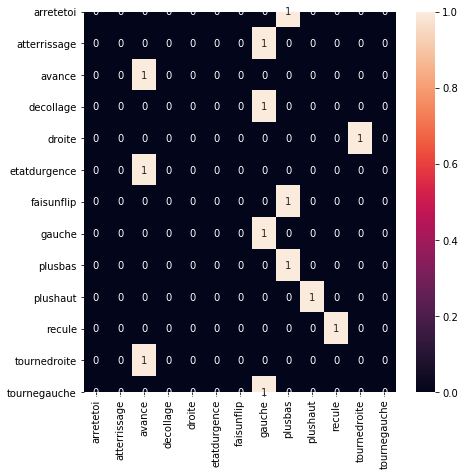

In [34]:
drawConfusionMatrix(cfsm)

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 13 bonnes réponses. 
 SCORE = 1.0%


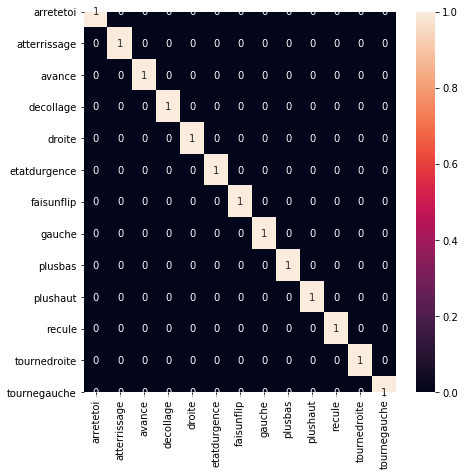

In [35]:
z = buildConfusionMatrix("reference", "reference")
drawConfusionMatrix(z)

In [46]:
cfsm, cpt = buildConfusionMatrix("nonbruite", "reference", "M02")
drawConfusionMatrix(cfsm)

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 10 bonnes réponses. 
 SCORE = 0.77%


ValueError: too many values to unpack (expected 2)

Comparaison M01 sans bruit avec F01 sans bruit

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 8 bonnes réponses. 
 SCORE = 0.62%


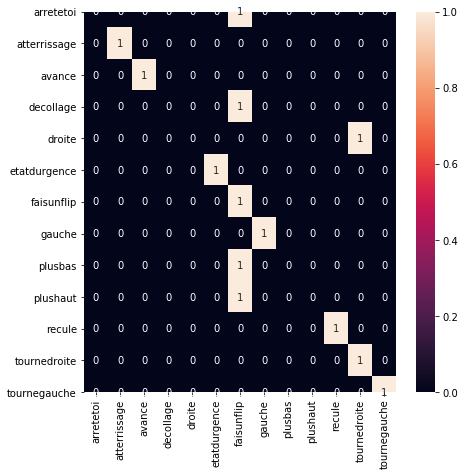

In [47]:
cfsm = buildConfusionMatrix("reference", "nonbruite", "F01")
drawConfusionMatrix(cfsm)

Partie III, ACP

In [48]:
def moyenneMfccs(enrgstrm):
    L = []
    for e in enrgstrm:
        m1, sr_m1 = librosa.load(e)
        mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
        n_mfcc=12)
        L.append(np.mean(mfcc_m1.transpose(), axis = 0))
    return np.asarray(L)

I = moyenneMfccs(all_actions_from_path_withID("nonbruite", "M01")).transpose() # on récupère la matrice qui pour la ligne i, contient le vecteur de dimension 12 qui est la moyenne colonne par colonne de l'action i.
scaler = StandardScaler()
scaler.fit(I)
I_center = scaler.transform(I) # on centre les données

In [51]:
pca = PCA(n_components=3)
P = pca.fit_transform(I_center).transpose() # réduction en dimension 3
X1, X2, X3 = P
print(P.shape)

(3, 12)


In [52]:
z = moyenneMfccs(all_actions_from_path_withID("test", "M01")).transpose()
# print(z)
z.shape

(12, 13)

In [53]:
print(P.shape)
(P @ z).shape


(3, 12)


(3, 13)

In [175]:
#Construction data set de training
K = []

typeSon = "nonbruite"
all_ids = IDs[typeSon]

print(all_ids)

for e in range(len(all_ids)):
    temp = moyenneMfccs(all_actions_from_path_withID(typeSon, all_ids[e])).transpose()
    K.extend((P @ temp).transpose())

#Construction des réponses (apprentissage supervisé)
suppervised = []
for ID in IDs[typeSon]:
    suppervised.extend(all_actions_from_path_withID(typeSon, ID))

len(suppervised)
    

['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'F01', 'F02', 'F03', 'F04', 'F05']


234

In [189]:
#Construction data set de test
K_test = []

typeSon_test = "diegob"
all_ids = IDs[typeSon_test]

print(all_ids)

for e in range(len(all_ids)):
    temp = moyenneMfccs(all_actions_from_path_withID(typeSon_test, all_ids[e])).transpose()
    K_test.extend((P @ temp).transpose())

K_test = np.array(K_test)

print(K_test.shape)
print(K_test)

['M21']
(13, 3)
[[-3.2315833e+03 -4.8371120e+01 -4.8550925e+00]
 [-3.2034297e+03 -5.4889915e+01 -3.2897570e+00]
 [-3.0173928e+03 -4.9158165e+01 -8.0217600e+00]
 [-3.1734871e+03 -4.5734230e+01 -1.9816295e+00]
 [-3.4033887e+03 -4.2820404e+01 -6.9715619e+00]
 [-3.0064109e+03 -5.1108883e+01 -1.8432672e+00]
 [-3.0434946e+03 -4.5921547e+01 -1.1660341e+00]
 [-3.1667742e+03 -4.5121613e+01 -3.9697158e+00]
 [-3.4522654e+03 -3.7475731e+01 -3.9013579e+00]
 [-3.5968293e+03 -3.6912750e+01 -4.1135235e+00]
 [-3.3719622e+03 -3.8446480e+01 -2.4868119e+00]
 [-3.2971350e+03 -4.0957684e+01 -4.8788447e+00]
 [-3.2757283e+03 -4.7340691e+01 -3.3872137e+00]]


In [180]:
K = np.array(K)
print(K.shape)

(234, 3)


In [196]:
# remarque : si on utilise nonbruité pour l'apprentissage et référence (qui est un sous ensemble de nonbruité) 
# pour le test, bonne nouvelle on obtient 13 / 13. Par contre si on prend autre chose pour le test les résultats
# sont (très) mauvais.
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(K, suppervised) 

res = neigh.predict(K_test)
cpt = 0
for pred_i, res_i in list(zip(res, actions)):
    left, right = pred_i.split('/')[-1].split('.')[0].split('_')[-1], res_i 
    if left == right:
        cpt+=1
    print(f" {left} \t | {right} ")
print("score final : ", cpt, " / 13")

 atterrissage 	 | arretetoi 
 atterrissage 	 | atterrissage 
 atterrissage 	 | avance 
 atterrissage 	 | decollage 
 atterrissage 	 | droite 
 atterrissage 	 | etatdurgence 
 atterrissage 	 | faisunflip 
 atterrissage 	 | gauche 
 atterrissage 	 | plusbas 
 atterrissage 	 | plushaut 
 atterrissage 	 | recule 
 atterrissage 	 | tournedroite 
 atterrissage 	 | tournegauche 
score final :  1  / 13
